In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.ticker import MaxNLocator
import os
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


from scipy.signal import hilbert
from scipy.signal import welch
from scipy.stats import entropy
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.ticker import ScalarFormatter


In [2]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],  # Times for publication
    "font.size": 10,                    # Base font size
    "axes.labelsize": 16,              # Axis label font size
    "axes.labelweight": "bold",
    "font.weight": "bold",   
    "axes.titlesize": 13,              # Axis title (not fig title)
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 15,              # Legend font size

    "figure.dpi": 300,                 # Display resolution
    "savefig.dpi": 300,                # Save resolution
    "figure.figsize": (5,2),     # For 0.5\textwidth plot
    # "figure.constrained_layout.use": False,  # Better spacing than tight_layout

    "axes.linewidth": 0.8,             # Thin but clear axes lines
    "lines.linewidth": 1.2,
    "lines.markersize": 5,

    "axes.spines.top": False,
    "axes.spines.right": False,

    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.minor.size": 2,
    "ytick.minor.size": 2,

    "legend.frameon": False,
    "legend.handlelength": 2.0,        # Slightly longer legend lines
    "legend.handletextpad": 0.5,

    "pdf.fonttype": 42,                # Embed editable fonts in PDF
    "ps.fonttype": 42
})

## Closed Loop

In [3]:
dbs_pulses_closed = np.loadtxt(r'DATA\CLOSED_LOOP\K_0.45\DBS_pulses.csv', delimiter=',')
X_mean_closed = np.loadtxt(r'DATA\CLOSED_LOOP\K_0.45\X_mean.csv', delimiter=',')
# x_data_closed = np.loadtxt(r'DATA\CLOSED_LOOP\K_0.45\x_oscillators.csv', delimiter=',')

In [4]:
sr = 12000

# --- FFT Computation ---
fft_output_pulses = fft(dbs_pulses_closed)
fft_output_X_without_dbs = fft(X_mean_closed[0:100000])
fft_output_Xdbs = fft(X_mean_closed[200000:400000])

# Lengths
N_p = len(fft_output_pulses)
N_x = len(fft_output_X_without_dbs)
N_xdbs = len(fft_output_Xdbs)

# Frequency axes (positive half only)
freq_p_closed = np.fft.fftfreq(N_p, 1/sr)[:N_p // 2]
freq_x_closed = np.fft.fftfreq(N_x, 1/sr)[:N_x // 2]
freq_xdbs_closed = np.fft.fftfreq(N_xdbs, 1/sr)[:N_xdbs // 2]

# Raw FFT magnitudes (positive frequency only)
mag_pulses = np.abs(fft_output_pulses[:N_p // 2])
mag_X_wo_dbs = np.abs(fft_output_X_without_dbs[:N_x // 2])
mag_X_dbs = np.abs(fft_output_Xdbs[:N_xdbs // 2])

# --- Gaussian Smoothing ---
sigma = 5  # Adjust for more or less smoothing
mag_pulses_smooth_closed = gaussian_filter1d(mag_pulses, sigma=sigma)
mag_X_wo_dbs_smooth_closed = gaussian_filter1d(mag_X_wo_dbs, sigma=sigma)
mag_X_dbs_smooth_closed = gaussian_filter1d(mag_X_dbs, sigma=sigma)


## Standard DBS

In [5]:
dbs_pulses = np.loadtxt(r'DATA\STANDARD_DBS\K_0.45\DBS_pulses_amp_2.txt', delimiter=',')
X_mean = np.loadtxt(r'DATA\STANDARD_DBS\K_0.45\X_mean_amp_2.txt', delimiter=',')
# x_data_osc = np.loadtxt(r'DATA\STANDARD_DBS\K_0.45\x_oscillators_amp_2.txt', delimiter=',')

dbs_pulses_std = dbs_pulses[0:400000]
X_mean_std = X_mean[0:400000]
# x_data_osc_std = x_data_osc[0:400000, ]

In [6]:
sr = 12000

# --- FFT Computation ---
fft_output_pulses = fft(dbs_pulses_std)
fft_output_X_without_dbs = fft(X_mean_std[0:100000])
fft_output_Xdbs = fft(X_mean_std[300000:400000,])

# Lengths
N_p = len(fft_output_pulses)
N_x = len(fft_output_X_without_dbs)
N_xdbs = len(fft_output_Xdbs)

# Frequency axes (positive half only)
freq_p_std = np.fft.fftfreq(N_p, 1/sr)[:N_p // 2]
freq_x_std = np.fft.fftfreq(N_x, 1/sr)[:N_x // 2]
freq_xdbs_std = np.fft.fftfreq(N_xdbs, 1/sr)[:N_xdbs // 2]

# Raw FFT magnitudes (positive frequency only)
mag_pulses = np.abs(fft_output_pulses[:N_p // 2])
mag_X_wo_dbs = np.abs(fft_output_X_without_dbs[:N_x // 2])
mag_X_dbs = np.abs(fft_output_Xdbs[:N_xdbs // 2])

# --- Gaussian Smoothing ---
sigma = 5  # Adjust for more or less smoothing
mag_pulses_smooth_std = gaussian_filter1d(mag_pulses, sigma=sigma)
mag_X_wo_dbs_smooth_std = gaussian_filter1d(mag_X_wo_dbs, sigma=sigma)
mag_X_dbs_smooth_std = gaussian_filter1d(mag_X_dbs, sigma=sigma)


## Open loop: Low

In [7]:
dbs_pulses = np.loadtxt(r'DATA\OPEN_LOOP_LOW_AMP\K_0.45\DBS_pulses_amp_0.2.txt', delimiter=',')
X_mean = np.loadtxt(r'DATA\OPEN_LOOP_LOW_AMP\K_0.45\X_mean_amp_0.2.txt', delimiter=',')
# x_data_osc = np.loadtxt(r'DATA\OPEN_LOOP_LOW_AMP\K_0.45\x_ocillators_amp_0.2.txt', delimiter=',')

dbs_pulses_open_low = dbs_pulses[0:400000]
X_mean_open_low = X_mean[0:400000]
# x_data_osc_open_low = x_data_osc[0:400000, ]

In [8]:
sr = 12000

# --- FFT Computation ---
fft_output_pulses = fft(dbs_pulses_open_low)
fft_output_X_without_dbs = fft(X_mean_open_low[0:100000])
fft_output_Xdbs = fft(X_mean_open_low[300000:400000,])

# Lengths
N_p = len(fft_output_pulses)
N_x = len(fft_output_X_without_dbs)
N_xdbs = len(fft_output_Xdbs)

# Frequency axes (positive half only)
freq_p_open_low = np.fft.fftfreq(N_p, 1/sr)[:N_p // 2]
freq_x_open_low = np.fft.fftfreq(N_x, 1/sr)[:N_x // 2]
freq_xdbs_open_low = np.fft.fftfreq(N_xdbs, 1/sr)[:N_xdbs // 2]

# Raw FFT magnitudes (positive frequency only)
mag_pulses = np.abs(fft_output_pulses[:N_p // 2])
mag_X_wo_dbs = np.abs(fft_output_X_without_dbs[:N_x // 2])
mag_X_dbs = np.abs(fft_output_Xdbs[:N_xdbs // 2])

# --- Gaussian Smoothing ---
sigma = 5  # Adjust for more or less smoothing
mag_pulses_smooth_open_low = gaussian_filter1d(mag_pulses, sigma=sigma)
mag_X_wo_dbs_smooth_open_low = gaussian_filter1d(mag_X_wo_dbs, sigma=sigma)
mag_X_dbs_smooth_open_low = gaussian_filter1d(mag_X_dbs, sigma=sigma)


## Open loop : High

In [9]:
dbs_pulses = np.loadtxt(r'DATA\OPEN_LOOP_HIGH_AMP\K_0.45\DBS_pulses_amp_0.8.txt', delimiter=',')
X_mean = np.loadtxt(r'DATA\OPEN_LOOP_HIGH_AMP\K_0.45\X_mean_amp_0.8.txt', delimiter=',')
# x_data_osc = np.loadtxt(r'DATA\OPEN_LOOP_HIGH_AMP\K_0.45\x_oscillators_amp_0.8.txt', delimiter=',')

dbs_pulses_open_high = dbs_pulses[0:400000]
X_mean_open_high = X_mean[0:400000]
# x_data_osc_open_high = x_data_osc[0:400000, ]

In [10]:
sr = 12000

# --- FFT Computation ---
fft_output_pulses = fft(dbs_pulses_open_high)
fft_output_X_without_dbs = fft(X_mean_open_high[0:100000])
fft_output_Xdbs = fft(X_mean_open_high[300000:400000,])

# Lengths
N_p = len(fft_output_pulses)
N_x = len(fft_output_X_without_dbs)
N_xdbs = len(fft_output_Xdbs)

# Frequency axes (positive half only)
freq_p_open_high = np.fft.fftfreq(N_p, 1/sr)[:N_p // 2]
freq_x_open_high = np.fft.fftfreq(N_x, 1/sr)[:N_x // 2]
freq_xdbs_open_high = np.fft.fftfreq(N_xdbs, 1/sr)[:N_xdbs // 2]

# Raw FFT magnitudes (positive frequency only)
mag_pulses = np.abs(fft_output_pulses[:N_p // 2])
mag_X_wo_dbs = np.abs(fft_output_X_without_dbs[:N_x // 2])
mag_X_dbs = np.abs(fft_output_Xdbs[:N_xdbs // 2])

# --- Gaussian Smoothing ---
sigma = 5  # Adjust for more or less smoothing
mag_pulses_smooth_open_high = gaussian_filter1d(mag_pulses, sigma=sigma)
mag_X_wo_dbs_smooth_open_high = gaussian_filter1d(mag_X_wo_dbs, sigma=sigma)
mag_X_dbs_smooth_open_high = gaussian_filter1d(mag_X_dbs, sigma=sigma)


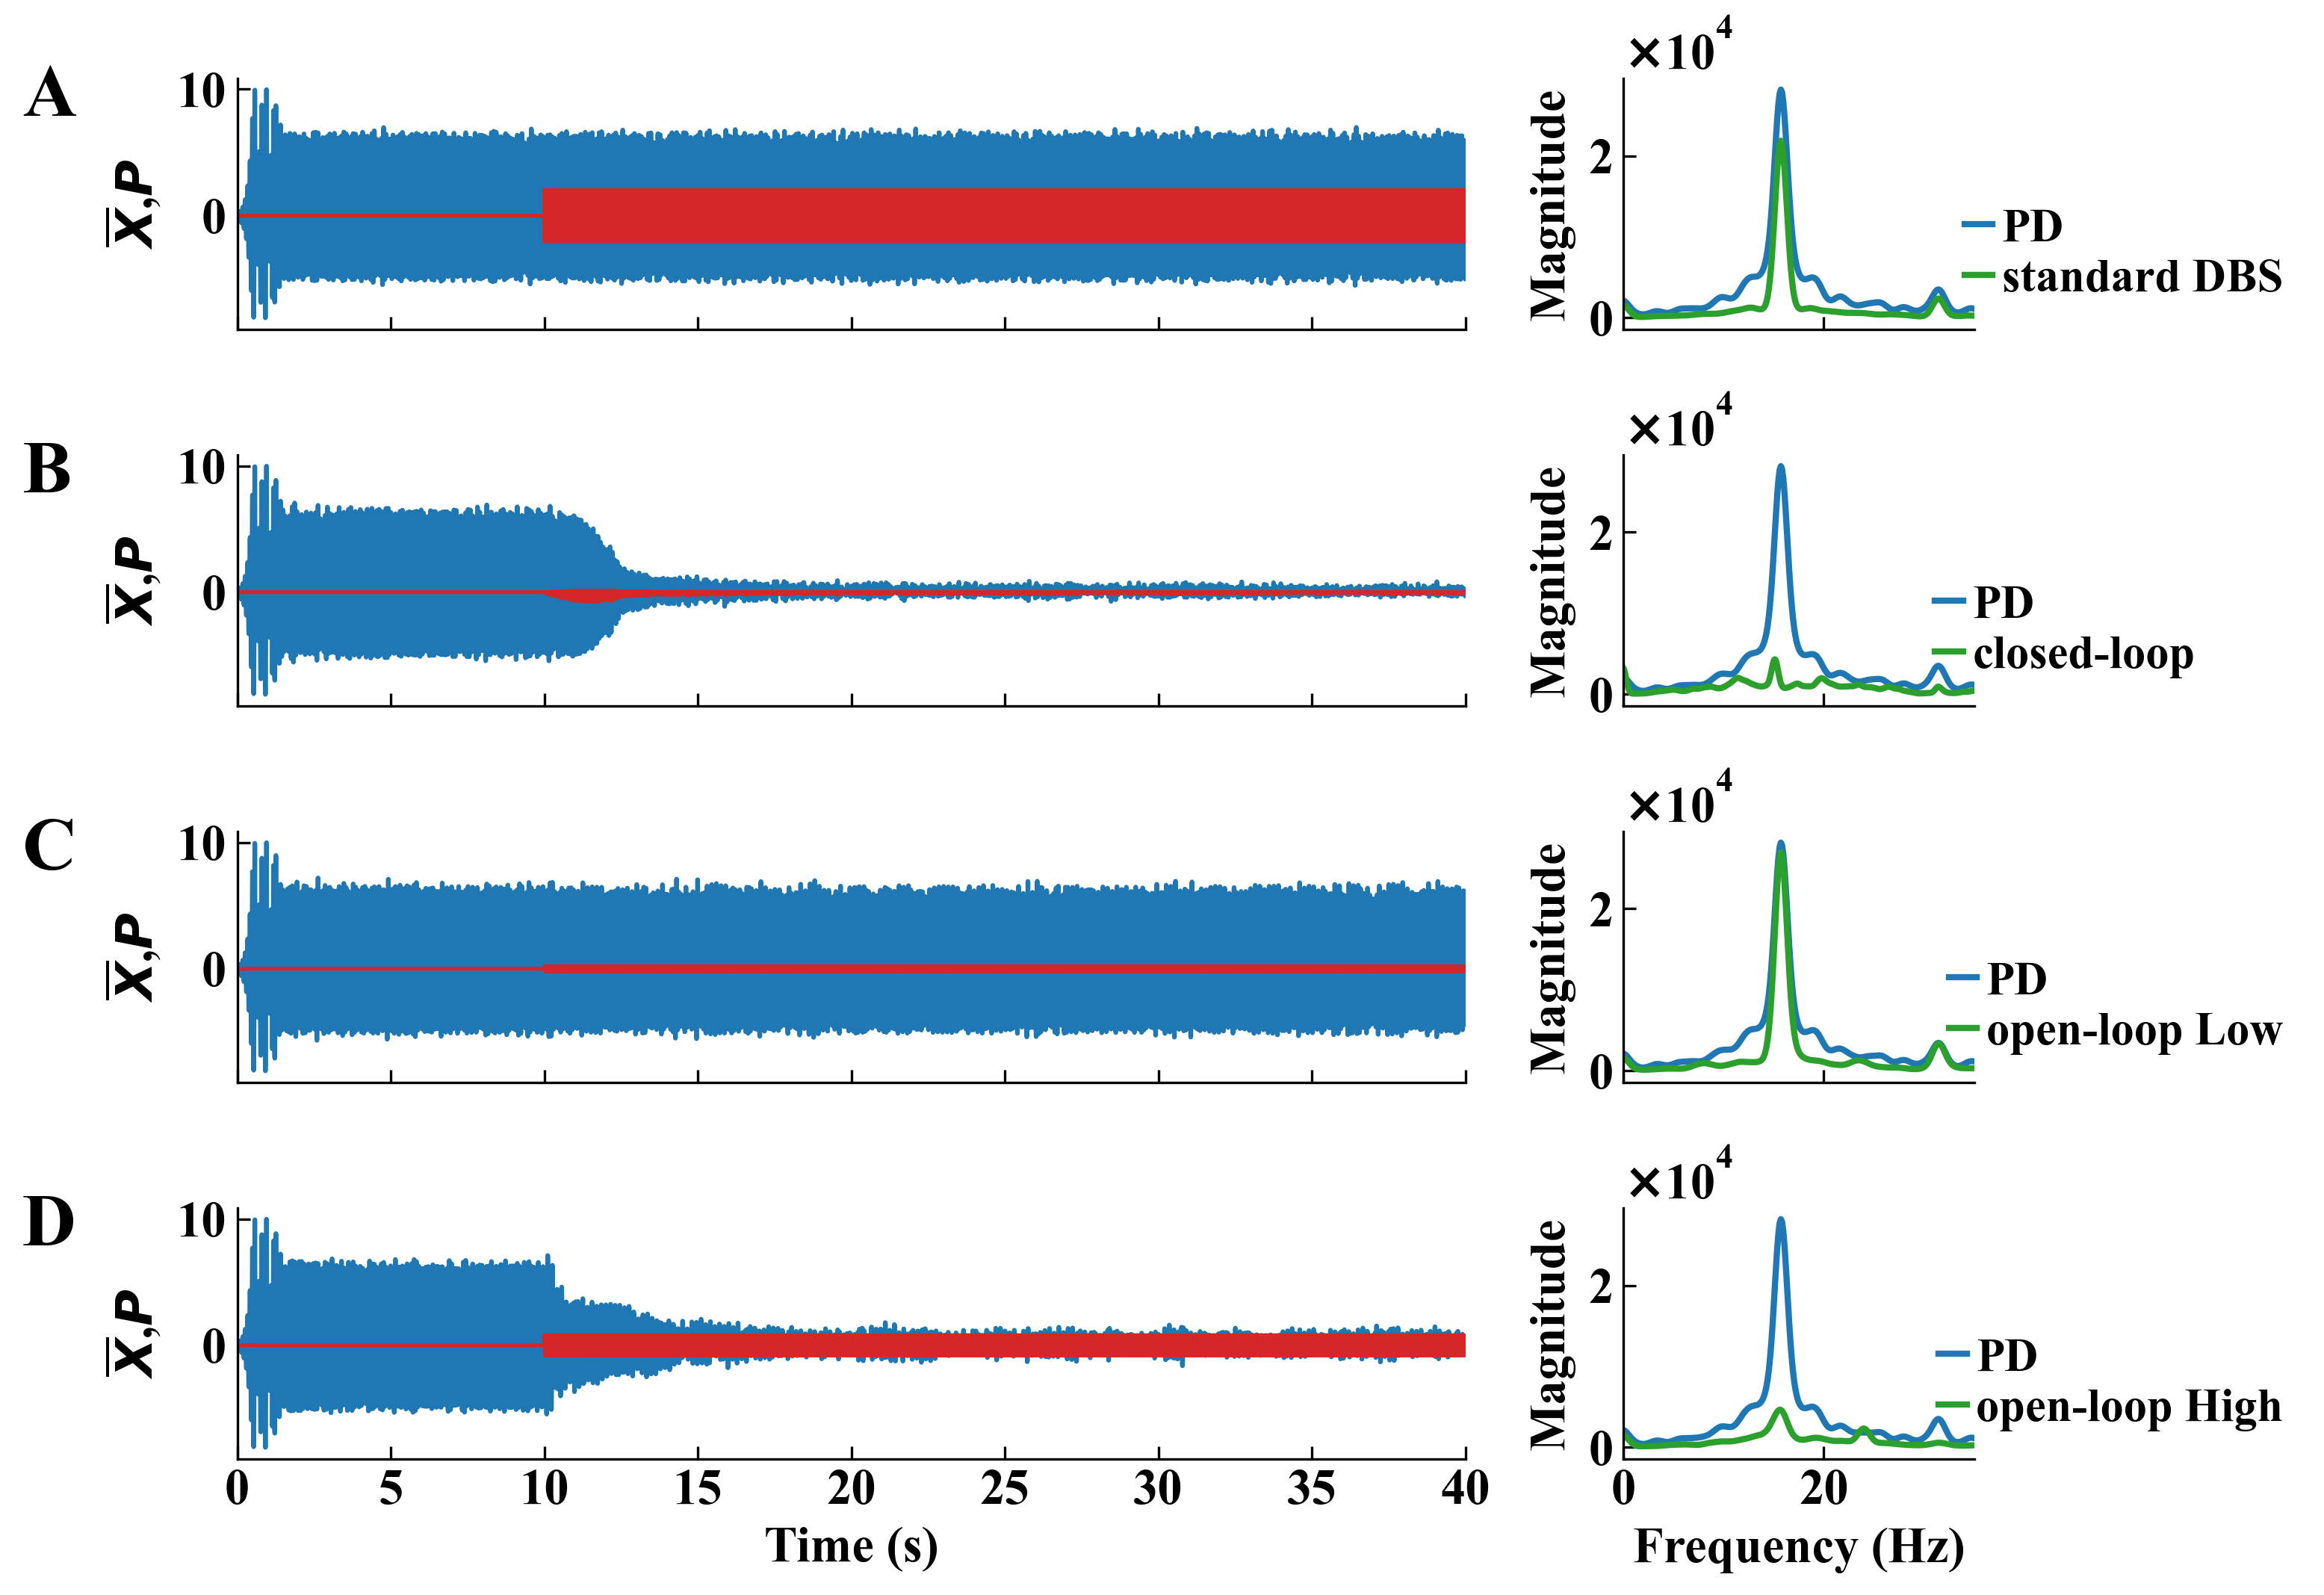

In [11]:
t = np.linspace(0, 40, 400000)
# Plot
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(4, 2, width_ratios=[3.5, 1])  # First plot twice as wide as second
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax4 = fig.add_subplot(gs[1, 1], sharex=ax2)
ax5 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax6 = fig.add_subplot(gs[2, 1], sharex=ax2)
ax7 = fig.add_subplot(gs[3, 0], sharex=ax1)
ax8 = fig.add_subplot(gs[3, 1], sharex=ax2)

# Hide x tick labels for all but the last row
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    plt.setp(ax.get_xticklabels(), visible=False)
    
# standard plotting
ax1.plot(t, X_mean_std, label=r'$X_{mean}$', color='#1f77b4', linewidth=1.5)
ax1.plot(t, dbs_pulses_std, label='Standard DBS', color='#d62728', linewidth=1.25)

ax1.set_ylabel('$\overline{X}$,$P$')
ax1.set_xlim(0, 40)

line1, = ax2.plot(freq_x_std, mag_X_wo_dbs_smooth_std, color='#1f77b4', linewidth=2)
line2, = ax2.plot(freq_xdbs_std, mag_X_dbs_smooth_std, color='#2ca02c', linewidth=2)
ax2.set_xlim(0, 50)
ax2.set_ylabel('Magnitude')
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
dot1 = Line2D([0], [0], color='#1f77b4', linestyle='-', linewidth=2)
dot2 = Line2D([0], [0], color='#2ca02c', linestyle='-', linewidth=2)
ax2.legend([dot1, dot2], ['PD', 'standard DBS'],
           frameon=False, loc='upper right', bbox_to_anchor=(2., 0.65),
           handlelength=0.6, handletextpad=0.2, labelspacing=0.15)


# Closed_loop plotting
ax3.plot(t, X_mean_closed, label=r'$X_{mean}$', color='#1f77b4', linewidth=1.5)
ax3.plot(t, dbs_pulses_closed, label='Closed loop', color='#d62728', linewidth=1.25)
ax3.set_ylabel('$\overline{X}$,$P$')

line1, = ax4.plot(freq_x_closed, mag_X_wo_dbs_smooth_closed, color='#1f77b4', linewidth=2)
line2, = ax4.plot(freq_xdbs_closed, mag_X_dbs_smooth_closed, color='#2ca02c', linewidth=2)
ax4.set_xlim(0, 50)
ax4.set_ylabel('Magnitude')
ax4.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
dot1 = Line2D([0], [0], color='#1f77b4', linestyle='-', linewidth=2)
dot2 = Line2D([0], [0], color='#2ca02c', linestyle='-', linewidth=2)
ax4.legend([dot1, dot2], ['PD', 'closed-loop'],
           frameon=False, loc='upper right', bbox_to_anchor=(1.75, 0.65),
           handlelength=0.6, handletextpad=0.2, labelspacing=0.15)


# Open loop: low amp
ax5.plot(t, X_mean_open_low, label=r'$X_{mean}$', color='#1f77b4', linewidth=1.5)
ax5.plot(t, dbs_pulses_open_low, label='Open loop', color='#d62728', linewidth=1.25)
ax5.set_ylabel('$\overline{X}$,$P$')

line1, = ax6.plot(freq_x_open_low, mag_X_wo_dbs_smooth_open_low, color='#1f77b4', linewidth=2)
line2, = ax6.plot(freq_xdbs_open_low, mag_X_dbs_smooth_open_low, color='#2ca02c', linewidth=2)
ax6.set_xlim(0, 50)
ax6.set_ylabel('Magnitude')
ax6.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax6.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
dot1 = Line2D([0], [0], color='#1f77b4', linestyle='-', linewidth=2)
dot2 = Line2D([0], [0], color='#2ca02c', linestyle='-', linewidth=2)
ax6.legend([dot1, dot2], ['PD', 'open-loop Low'],
           frameon=False, loc='upper right', bbox_to_anchor=(2., 0.65),
           handlelength=0.6, handletextpad=0.2, labelspacing=0.15)


# Open loop: High amp
ax7.plot(t, X_mean_open_high, label=r'$X_{mean}$', color='#1f77b4', linewidth=1.5)
ax7.plot(t, dbs_pulses_open_high, label='Open loop', color='#d62728', linewidth=1.25)
ax7.set_xlabel('Time (s)')
ax7.set_ylabel('$\overline{X}$,$P$')

line1, = ax8.plot(freq_x_open_high, mag_X_wo_dbs_smooth_open_high, color='#1f77b4', linewidth=2)
line2, = ax8.plot(freq_xdbs_open_high, mag_X_dbs_smooth_open_high, color='#2ca02c', linewidth=2)
ax8.set_xlim(0, 50)
ax8.set_xlabel('Frequency (Hz)')
ax8.set_ylabel('Magnitude')
ax8.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax8.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
dot1 = Line2D([0], [0], color='#1f77b4', linestyle='-', linewidth=2)
dot2 = Line2D([0], [0], color='#2ca02c', linestyle='-', linewidth=2)
ax8.legend([dot1, dot2], ['PD', 'open-loop High'],
           frameon=False, loc='upper right', bbox_to_anchor=(2., 0.65),
           handlelength=0.6, handletextpad=0.2, labelspacing=0.15)

labels = ['A', 'B', 'C', 'D']
axes = [ax1, ax3, ax5, ax7]

for label, ax in zip(labels, axes):
    ax.text(-0.175, 1.05, label, transform=ax.transAxes,
            fontsize=24, fontweight='bold', va='top', ha='left',
            bbox=dict(facecolor='white', edgecolor='none', pad=0.5, alpha=0.7))
    
for ax in [ax1, ax3, ax5, ax7]:
    ax.set_xlim(0, 40)

for ax in [ax2, ax4, ax6, ax8]:
    ax.set_xlim(0, 35)
# ax2.set_ylim(bottom=1)
# ax2.margins(y=0)
# ax4.set_ylim(bottom=1)
# ax4.margins(y=0)
# ax6.set_ylim(bottom=1)
# ax6.margins(y=0)
# ax8.set_ylim(bottom=1)
# ax8.margins(y=0)
# ...after creating fig and axes...
fig.subplots_adjust(hspace=0.5)  # Increase value for more vertical gap, decrease for less
# ...existing code...